In [1]:
# Importing pandas for numerical variable analysis and os, numpy, string, and nltk for text variable analysis.

import pandas as pd
import os as os
import numpy as np
import string as string
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
 

#nltk.download('stopwords')


In [2]:
bbSimple = pd.read_csv('bbNoTextChange.csv')

In [3]:
bbSimple.columns

Index(['file_name', 'Date', 'Year', 'District', 'econ_index',
       'econ_index_levels', 'USPHCI', 'econ_index_dummy', 'compound_score',
       'mean_sentiment', 'median_sentiment', 'IQR_sentiment',
       'sentiment_trigram', 'econ_index_change', 'econ_index_change_dummy'],
      dtype='object')

In [4]:
bbSimple.describe()

,Year,District,econ_index,econ_index_levels,USPHCI,econ_index_dummy,compound_score,mean_sentiment,median_sentiment,IQR_sentiment,sentiment_trigram,econ_index_change,econ_index_change_dummy
count,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4230.000000,4242.000000
mean,2000.900519,6.500943,1.989022,87.870464,85.881443,0.550212,0.864181,0.127853,0.089875,0.443621,0.123576,0.304782,0.844177
std,12.772214,3.450888,5.834020,26.618277,25.915295,0.497531,0.452598,0.081771,0.120031,0.107984,0.166468,1.134742,0.362730
min,1979.000000,1.000000,-20.980000,40.640000,46.370000,0.000000,-0.998400,-0.197844,-0.270000,0.000000,-0.695000,-27.194756,0.000000
25%,1990.000000,4.000000,-2.140000,64.915000,64.050000,0.000000,0.987200,0.075606,0.000000,0.381800,0.000000,0.149355,1.000000
50%,2001.000000,6.500000,0.600000,88.035000,88.700000,1.000000,0.996200,0.132182,0.000000,0.440400,0.112766,0.330879,1.000000
75%,2012.000000,9.000000,6.267500,103.027500,102.850000,1.000000,0.998300,0.182429,0.177900,0.509800,0.236796,0.558159,1.000000
max,2023.000000,12.000000,23.890000,161.490000,138.240000,1.000000,0.999900,0.401186,0.526700,0.994250,0.704417,7.901517,1.000000


In [44]:
# Split the data into training and testing sets with an 80/20 ratio
train_set, test_set = train_test_split(bbSimple, test_size=0.2, random_state=7)

# 'test_size' specifies the proportion of the dataset to include in the test split (0.2 means 20%)
# 'random_state' is used to ensure reproducibility, you can set it to any integer value for consistency

# You can now use 'train_set' and 'test_set' for your machine learning tasks


In [45]:
# Assuming 'target_column' is the name of the column you want to predict
X_train = train_set.drop(columns=['econ_index_change_dummy'])
y_train = train_set['econ_index_change_dummy']

X_test = test_set.drop(columns=['econ_index_change_dummy'])
y_test = test_set['econ_index_change_dummy']


In [46]:
X_train = X_train[['mean_sentiment', 'IQR_sentiment', 'median_sentiment', 'compound_score', 'sentiment_trigram']]
X_test = X_test[['mean_sentiment', 'IQR_sentiment', 'median_sentiment', 'compound_score', 'sentiment_trigram']]


## 3. Model Selection and Training

In [47]:
from sklearn.ensemble import RandomForestClassifier  # or RandomForestRegressor for regression

# Create a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=7)  # You can adjust hyperparameters as needed

In [48]:
# Train the model on the training data
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=7)

In [49]:
# Make predictions on the test data
predictions = rf.predict(X_test)


In [50]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

# For 80/20 test/train split
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)


In [51]:
print("Accuracy:", accuracy)
print("F1:", f1)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.8457008244994111
F1: 0.9135313531353135
Recall: 0.9719101123595506
Precision: 0.8617683686176837


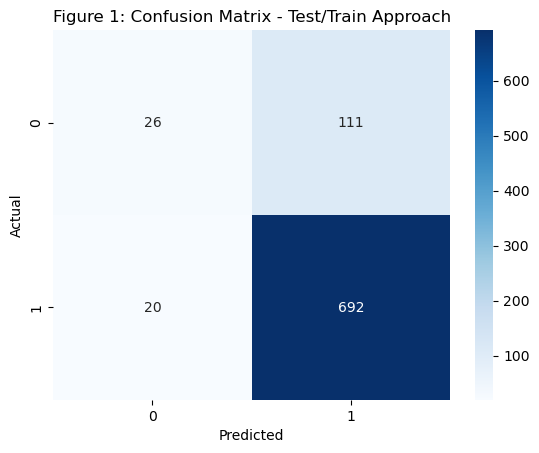

In [52]:
import seaborn as sns
conf_matrix_test_train = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix_test_train, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Figure 1: Confusion Matrix - Test/Train Approach")
#plt.savefig("confusion_matrix_testtrain.png")
plt.show()


In [53]:
TruePositive = 692
TrueNegative = 26
FalsePositive = 111
FalseNegative = 20

Precision = TruePositive / (TruePositive + FalsePositive)
Recall = TruePositive / (TruePositive + FalseNegative)
Sensitivity = Recall
Specificity = TrueNegative / (TrueNegative + FalsePositive)

print("Sensitivity:", Sensitivity)
print("Specificity:", Specificity)

Sensitivity: 0.9719101123595506
Specificity: 0.1897810218978102


In [54]:
# Calculating an ROC curve
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pylab as plt

r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf.predict_proba(X_test)

# Keep probabilities for positive outcome
rf_probs = rf_probs[:,1]


In [55]:
# Compute area under the curve
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
print('When guessing: AUC is ', r_auc)
print('Random Forest model: AUC is ', rf_auc)


When guessing: AUC is  0.5
Random Forest model: AUC is  0.7455558517181989


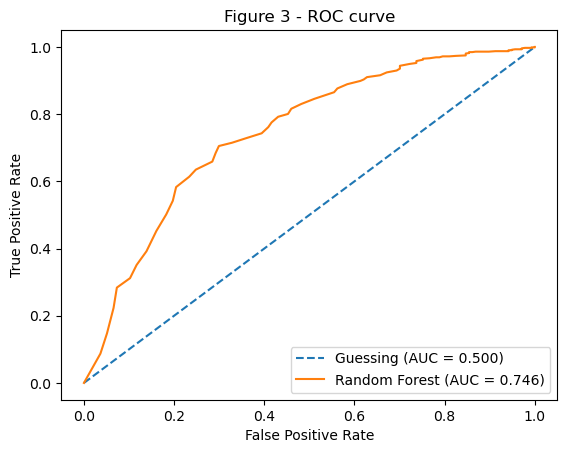

In [61]:
# Plotting the ROC curve

# Calulate false positive rate and true positive rate for the guess and the RF
r_fpr, r_tpr, r_thresholds = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_probs)

# Plot it
plt.plot(r_fpr, r_tpr, linestyle='--', label='Guessing (AUC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, linestyle='solid', label='Random Forest (AUC = %0.3f)' % rf_auc)

# Title and labels
plt.title('Figure 3 - ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.savefig("ROC_curve.png")
plt.show()

In [57]:
# Calculating Youden's J Statistic
    # J = Sensitivity + Specificity - 1
    # Higher values indicate better performance
    # Point on ROC that maximizes is often considered optimal
    # That is, maximizing the sum of sensitivity and specificity

youden_j = rf_tpr - rf_fpr
optimal_threshold = rf_thresholds[np.argmax(youden_j)]

optimal_sensitivity = rf_tpr[np.argmax(youden_j)]
optimal_specificity = 1 - rf_fpr[np.argmax(youden_j)]

print("Optimal Threshold:", optimal_threshold)
print("Sensitivity at Optimal Threshold:", optimal_sensitivity)
print("Specificity at Optimal Threshold:", optimal_specificity)

#The 0.85 optimal threshold means to classify values as 1 only if there's a greater than 85% chance that they will be 1.
    #This allows the model to predict more zeros.

Optimal Threshold: 0.85
Sensitivity at Optimal Threshold: 0.7050561797752809
Specificity at Optimal Threshold: 0.7007299270072993


In [58]:
# A tabular form of the ROC
    # You can see at the top that specificity is very good but sensitivty very bad
        # That is, if you set threshold to 100%: Calculate all as zeros
    # as you move down the list, the tradeoff is apparent
for i, threshold in enumerate(rf_thresholds):
    print(f"Threshold: {threshold:.4f}, Sensitivity: {rf_tpr[i]:.4f}, Specificity: {1 - rf_fpr[i]:.4f}")


Threshold: inf, Sensitivity: 0.0000, Specificity: 1.0000
Threshold: 1.0000, Sensitivity: 0.0871, Specificity: 0.9635
Threshold: 0.9900, Sensitivity: 0.1475, Specificity: 0.9489
Threshold: 0.9800, Sensitivity: 0.2233, Specificity: 0.9343
Threshold: 0.9700, Sensitivity: 0.2837, Specificity: 0.9270
Threshold: 0.9600, Sensitivity: 0.3118, Specificity: 0.8978
Threshold: 0.9500, Sensitivity: 0.3511, Specificity: 0.8832
Threshold: 0.9400, Sensitivity: 0.3919, Specificity: 0.8613
Threshold: 0.9300, Sensitivity: 0.4522, Specificity: 0.8394
Threshold: 0.9200, Sensitivity: 0.5014, Specificity: 0.8175
Threshold: 0.9100, Sensitivity: 0.5421, Specificity: 0.8029
Threshold: 0.9000, Sensitivity: 0.5829, Specificity: 0.7956
Threshold: 0.8900, Sensitivity: 0.6138, Specificity: 0.7664
Threshold: 0.8800, Sensitivity: 0.6348, Specificity: 0.7518
Threshold: 0.8700, Sensitivity: 0.6587, Specificity: 0.7153
Threshold: 0.8600, Sensitivity: 0.6840, Specificity: 0.7080
Threshold: 0.8500, Sensitivity: 0.7051, Spe

In [59]:
# Going to recalculate model using 0.85 threshold

threshold_85 = 0.85

# Make predictions on the test data
predictions_prob = rf.predict_proba(X_test)[:,1]
predictions_threshold = (predictions_prob >= threshold_85).astype(int)

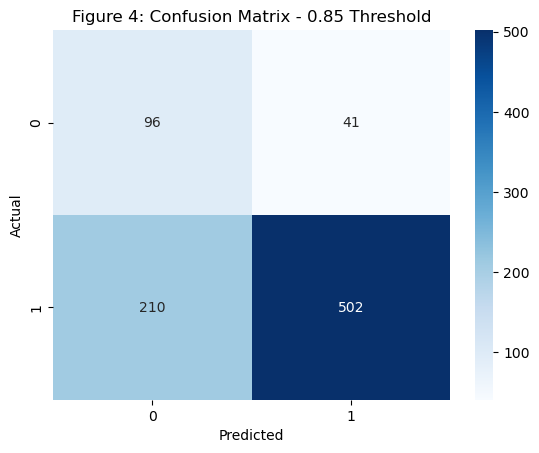

In [60]:
conf_matrix_threshold = confusion_matrix(y_test, predictions_threshold)
sns.heatmap(conf_matrix_threshold, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Figure 4: Confusion Matrix - 0.85 Threshold")
#plt.savefig("confusion_matrix_threshold.png")
plt.show()


In [22]:
TruePositive = conf_matrix_threshold[1,1]
TrueNegative = conf_matrix_threshold[0,0]
FalsePositive = conf_matrix_threshold[0,1]
FalseNegative = conf_matrix_threshold[1,0]

Precision = TruePositive / (TruePositive + FalsePositive)
Recall = TruePositive / (TruePositive + FalseNegative)
Sensitivity = Recall
Specificity = TrueNegative / (TrueNegative + FalsePositive)

accuracy = accuracy_score(y_test, predictions_threshold)

print("Sensitivity:", Sensitivity)
print("Specificity:", Specificity)
print("Accuracy:", accuracy)

Sensitivity: 0.7050561797752809
Specificity: 0.7007299270072993
Accuracy: 0.7043580683156655


### 4.2 - 5-fold cross validation

In [23]:
from sklearn.ensemble import RandomForestClassifier  # or RandomForestRegressor for regression
from sklearn.model_selection import cross_val_predict, KFold

In [24]:
# Preparing data
X = bbSimple[['mean_sentiment', 'median_sentiment', 'IQR_sentiment', 'compound_score', 'sentiment_trigram']]  # Specify your features here
y = bbSimple['econ_index_dummy']


In [25]:
model = RandomForestClassifier(n_estimators=100, random_state=7)  # You can adjust hyperparameters as needed


In [26]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Create a 5-fold cross-validation split

# Perform cross-validation and get predictions
predictions = cross_val_predict(model, X, y, cv=kf)


## 5. Model Evaluation

In [27]:
# Evaluate the model's performance
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score  # Use appropriate metrics for your problem

accuracy = accuracy_score(y, predictions)
f1 = f1_score(y, predictions)
precision = precision_score(y, predictions)
recall = recall_score(y, predictions)


In [28]:
print("Accuracy:", accuracy)
print("F1:", f1)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.5693069306930693
F1: 0.6279780085522297
Precision: 0.5983701979045402
Recall: 0.6606683804627249


In [29]:
from sklearn.metrics import classification_report  # Use appropriate metrics for your problem

class_report = classification_report(y, predictions)
print(f'Classification Report:\n{class_report}')


Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.46      0.49      1908
           1       0.60      0.66      0.63      2334

    accuracy                           0.57      4242
   macro avg       0.56      0.56      0.56      4242
weighted avg       0.57      0.57      0.57      4242



### 5.2 Cross-validation metric scores

In [30]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation and obtain metric scores (e.g., accuracy)
cv_scores = cross_val_score(model, X, y, cv=5)  # cv=5 means 5-fold cross-validation

# Print the cross-validated metric scores
print("Cross-validated Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


Cross-validated Accuracy Scores: [0.53592462 0.51943463 0.53891509 0.54481132 0.47641509]
Mean Accuracy: 0.5231001511211858


## 6. Results Visualization

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [32]:
# Compute the Confusion Matrix:
conf_matrix_kfold = confusion_matrix(y, predictions)


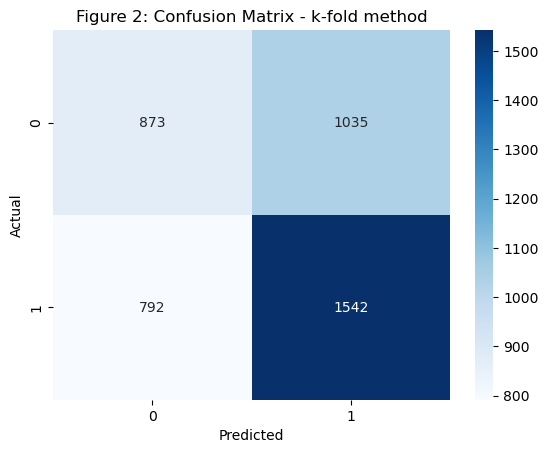

In [33]:
sns.heatmap(conf_matrix_kfold, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Figure 2: Confusion Matrix - k-fold method")
#plt.savefig("confusion_matrix_kfold.png")
plt.show()


In [34]:
TruePositiveCF = 1526
TrueNegativeCF = 913
FalsePositiveCF = 995
FalseNegativeCF = 808

PrecisionCF = TruePositiveCF / (TruePositiveCF + FalsePositiveCF)
RecallCF = TruePositiveCF / (TruePositiveCF + FalseNegativeCF)
SensitivityCF = RecallCF
SpecificityCF = TrueNegativeCF / (TrueNegativeCF + FalsePositiveCF)

print("Sensitivity:", SensitivityCF)
print("Specificity:", SpecificityCF)

Sensitivity: 0.6538131962296486
Specificity: 0.47851153039832284


### 6.2 - Feature importance plot
Want to show how much each predictor mattered.

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, KFold

In [36]:
# Previously defined 'X' and 'y' and 'kf' for 5-fold cross-validation
# Create an empty list to store feature importances for each fold
feature_importances_list = []

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Create and train a Random Forest model for this fold
    model = RandomForestClassifier(n_estimators=100, random_state=7)
    model.fit(X_train, y_train)
    
    # Retrieve and store feature importances for this fold
    feature_importances_list.append(model.feature_importances_)


In [37]:

# Calculate the mean feature importances across all folds
mean_feature_importances = np.mean(feature_importances_list, axis=0)

# Create a DataFrame with feature names and their mean importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': mean_feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


In [38]:
feature_importance_df.head()

,Feature,Importance
0,mean_sentiment,0.257180
4,sentiment_trigram,0.229755
2,IQR_sentiment,0.223157
3,compound_score,0.212030
1,median_sentiment,0.077877


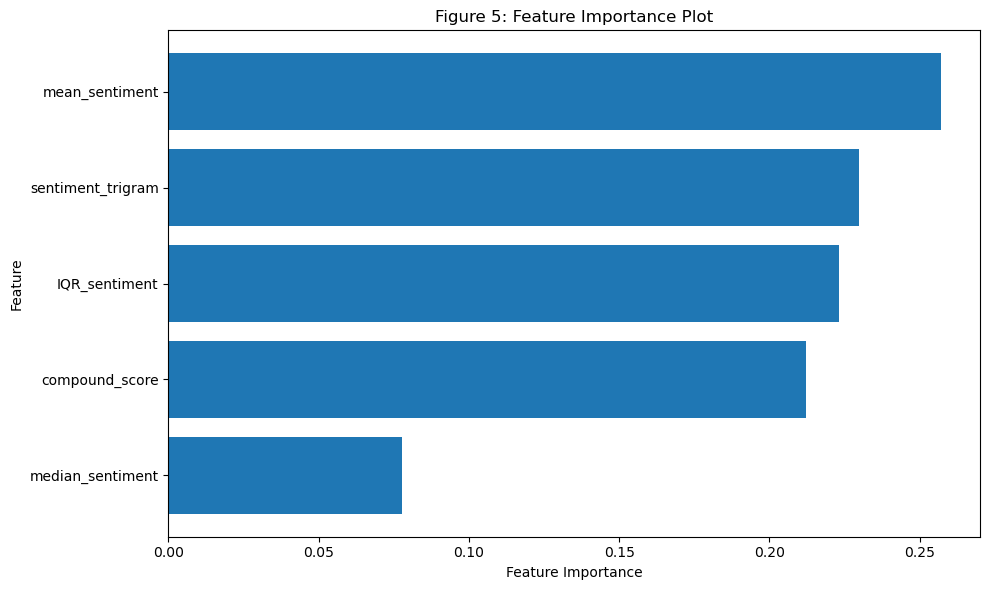

In [42]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Sort the DataFrame by Importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Create a bar plot for feature importances
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])

# Customize the plot
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Figure 5: Feature Importance Plot')
plt.tight_layout()

# Save the plot
#plt.savefig("feature_importance.png")

# Show the plot
plt.show()


## 7. Interpretation of Results

The model's accuracy is not good; it only correctly predicts whether the economic index is greater or worse than the national average 53.7% of the time. Those results are only marginally better than a guess.

However, I expected that with the limited number of variables. Mean sentiment is the most important predictor, followed by interquartile range of the sentiment. Median sentiment does not add much predictive power to the model.

My future plan is to improve the model's predictions by adding more predictor variables, namely related to the presence of key trigrams in the document.

